In [14]:
import pandas as pd
import numpy as np
import zipfile
import re
from datetime import datetime

In [15]:
!pip3 install spacy

In [3]:
import pathlib
pathlib.Path().absolute()

PosixPath('/content')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science Lab/dataset_v2/democrat_tweets_v2.csv', index_col=0)
dataset.head()
# for term in dataset:
#   print(term)
# print(dataset["Text"])
allText=[]
for tweet in dataset["text"]:
  print(tweet)
  allText.append(tweet)
#print(allText)

RT @BettyBowers: @CaslerNoel @realDonaldTrump For an idea of how creepy Donald J. Trump's "modeling" agency was, this is real: https://t.co…
Trump went to a movie as his brother died alone in the hospital, his niece Mary Trump writes  https://t.co/KWPq5ETRhm
RT @BY1959: The Trump administration just lent a troubled trucking company $700 million. The company was worth only $70 million

https://t.…
RT @crampell: We’re facing the worst economic conditions since the Great Depression, Fed is the only competent economic policymaking body w…
RT @jennycohn1: The Ds failure to fulfill their constitutional obligation to conduct more impeachment hearings is crushing. It isn’t “just”…
ICYMI-Concern over turnout was factor in postponing Trump rally, GOP advisers say https://t.co/NPxeYakoRG
Wow  https://t.co/McXjN2P4vC
.@JoeBiden: "The most sacred obligation of our government is to keep our troops safe when we send them into battle — and to care for them when they come home. We need a president who 

In [10]:
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset[['text','word_count']].head()
dataset.word_count.describe()

count    1245.000000
mean       22.002410
std         8.904143
min         2.000000
25%        17.000000
50%        22.000000
75%        25.000000
max        63.000000
Name: word_count, dtype: float64

In [12]:
freq = pd.Series(' '.join(dataset['text']).split()).value_counts()[:20]
freq

the      869
RT       826
to       805
and      565
a        477
of       440
Trump    437
is       373
in       343
for      313
I        183
that     170
on       166
Biden    159
his      153
are      139
The      132
be       132
you      130
have     129
dtype: int64

In [17]:
import nltk
#nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely


In [20]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [84]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["RT","SCREEN_NAME", "rt", "http", "https", "co", 'amp', 'donald', 'like', 'joe', 'kamala', 'say', 'want', 'get', 'know', 'country', 'would', 'make', 'going', 'one', 'year', 'day', 'time', 'love', 'great', 'joncoopertweets', 'said', 'let', 'feb', 'election','trying']
stop_words = stop_words.union(new_words)

In [85]:
corpus1 = []
for tweet in dataset['text']:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus1.append(text)

In [86]:
corpus = []
for text in corpus1:
  new_text = text.replace('realdonaldtrump', 'trump')
  final = new_text.replace('joebiden', 'biden')
  final = final.replace('kamalaharris', 'harris')
  final = final.replace('coronavirus', 'COVID 19')
  final = final.replace('corona', 'COVID 19')
  final = final.replace('covid', 'COVID 19')
  final = final.replace('rona', 'COVID 19')
  final = final.replace('trump trump', 'trump')
  #final = final.replace('president trump', 'trump')
  final = final.replace('united state', '')
  final = final.replace('white house', '')
  final = final.replace('nobel peace prize', 'nobel prize')
  final = final.replace('president elect', '')
  final = final.replace('affordable care act', 'care act')
  final = final.replace('voting', 'vote')
  final = final.replace('mike penny', 'mike pence')
  final = final.replace('biden president', 'president biden')
  corpus.append(final)

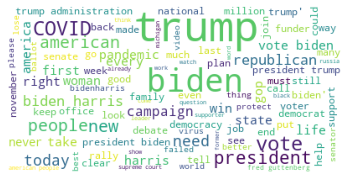

In [87]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())[:10]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['screen_name'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['caslernoel',
 'trump',
 'idea',
 'modeling',
 'agency',
 'real',
 'caslernoel trump',
 'trump idea',
 'modeling agency',
 'trump idea creepy']

[Text(0, 0, 'trump'),
 Text(0, 0, 'biden'),
 Text(0, 0, 'vote'),
 Text(0, 0, 'president'),
 Text(0, 0, 'covid'),
 Text(0, 0, '19'),
 Text(0, 0, 'people'),
 Text(0, 0, 'american'),
 Text(0, 0, 'harris'),
 Text(0, 0, 'new'),
 Text(0, 0, 'republican'),
 Text(0, 0, 'today'),
 Text(0, 0, 'need'),
 Text(0, 0, 'america'),
 Text(0, 0, 'campaign'),
 Text(0, 0, 'first'),
 Text(0, 0, 'day'),
 Text(0, 0, 'take'),
 Text(0, 0, 'back'),
 Text(0, 0, 'million')]

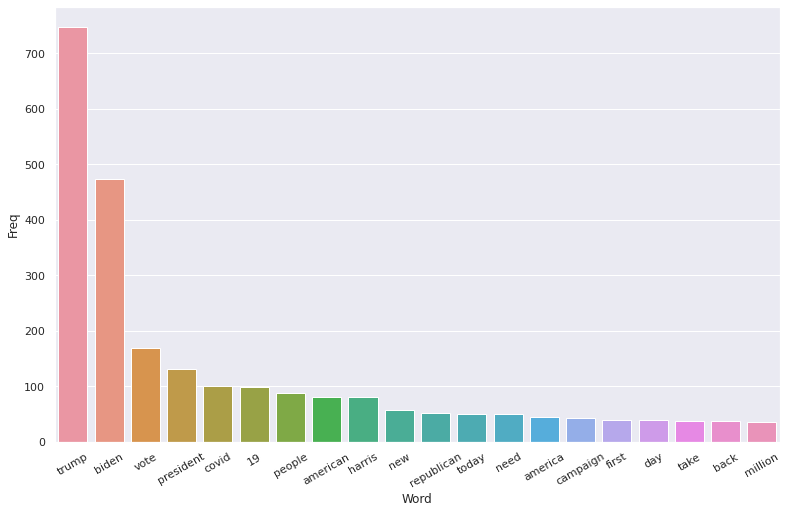

In [89]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0               covid 19    99
1           biden harris    50
2             vote biden    32
3        president trump    26
4   trump administration    25
5        president biden    25
6        american people    17
7          supreme court    17
8        fred guttenberg    16
9            biden trump    15
10            mike pence    14
11        trump campaign    12
12              dr fauci    10
13              care act    10
14            trump lied     9
15             biden win     9
16            vote early     9
17             vote mail     8
18            jill biden     8
19       trump supporter     8


[Text(0, 0, 'covid 19'),
 Text(0, 0, 'biden harris'),
 Text(0, 0, 'vote biden'),
 Text(0, 0, 'president trump'),
 Text(0, 0, 'trump administration'),
 Text(0, 0, 'president biden'),
 Text(0, 0, 'american people'),
 Text(0, 0, 'supreme court'),
 Text(0, 0, 'fred guttenberg'),
 Text(0, 0, 'biden trump'),
 Text(0, 0, 'mike pence'),
 Text(0, 0, 'trump campaign'),
 Text(0, 0, 'dr fauci'),
 Text(0, 0, 'care act'),
 Text(0, 0, 'trump lied'),
 Text(0, 0, 'biden win'),
 Text(0, 0, 'vote early'),
 Text(0, 0, 'vote mail'),
 Text(0, 0, 'jill biden'),
 Text(0, 0, 'trump supporter')]

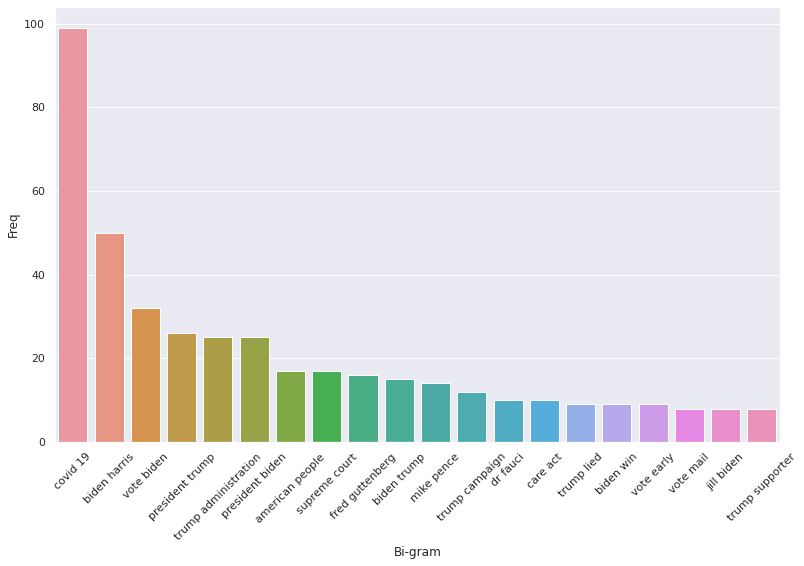

In [90]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [91]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
# doc=corpus[532]
doc=""
for line in corpus:
  doc= doc + str(line)
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [92]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,30)
# now print the results
print("\nText:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Text:
bettybowers caslernoel trump idea creepy j trump modeling agency realtrump went movie brother died alone hospital niece mary trump writes kwpq etrhmtrump administration lent troubled trucking company million company worth millioncrampell facing worst economic condition since depression fed competent economic policymaking body wjennycohn d failure fulfill constitutional obligation conduct impeachment hearing crushingicymi concern turnout factor postponing trump rally gop adviser npxeyakorgwow mcxjn p vcbiden sacred obligation government keep troop safe send battle care come home need president honor obligationfoofighters grohl whose mother career public school educator slam trump plan reopening school teacher teach die support protect national treasure resist xi arlmdtelectroboyusa america take shit trump bidentrump think kanye west running president prevent defeated bidendncwarroom trump think good place COVID 19 disagreeing dr fauci saying opposite directorsee number liuj sbf w